<h1><Center> Custering </Center></h1>

In [197]:
# Importing Libraries for Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
# Disabling Warning
import warnings
warnings.simplefilter('ignore')

In [199]:
# Reading the data
df = pd.read_csv("bank_marketing_part1_Data.csv")

In [200]:
# Checking Head of data
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [201]:
# Checking Tail of data
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


### Basic Stats about data

In [202]:
# Checking DF Shape
df.shape

(210, 7)

In [203]:
# Information about dataframe/data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB
None


In [204]:
# Null check
df.isnull().sum().any()

False

In [205]:
# Duplicate Check
df.duplicated().any()

False

In [206]:
# Describing Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### Univariate Analysis

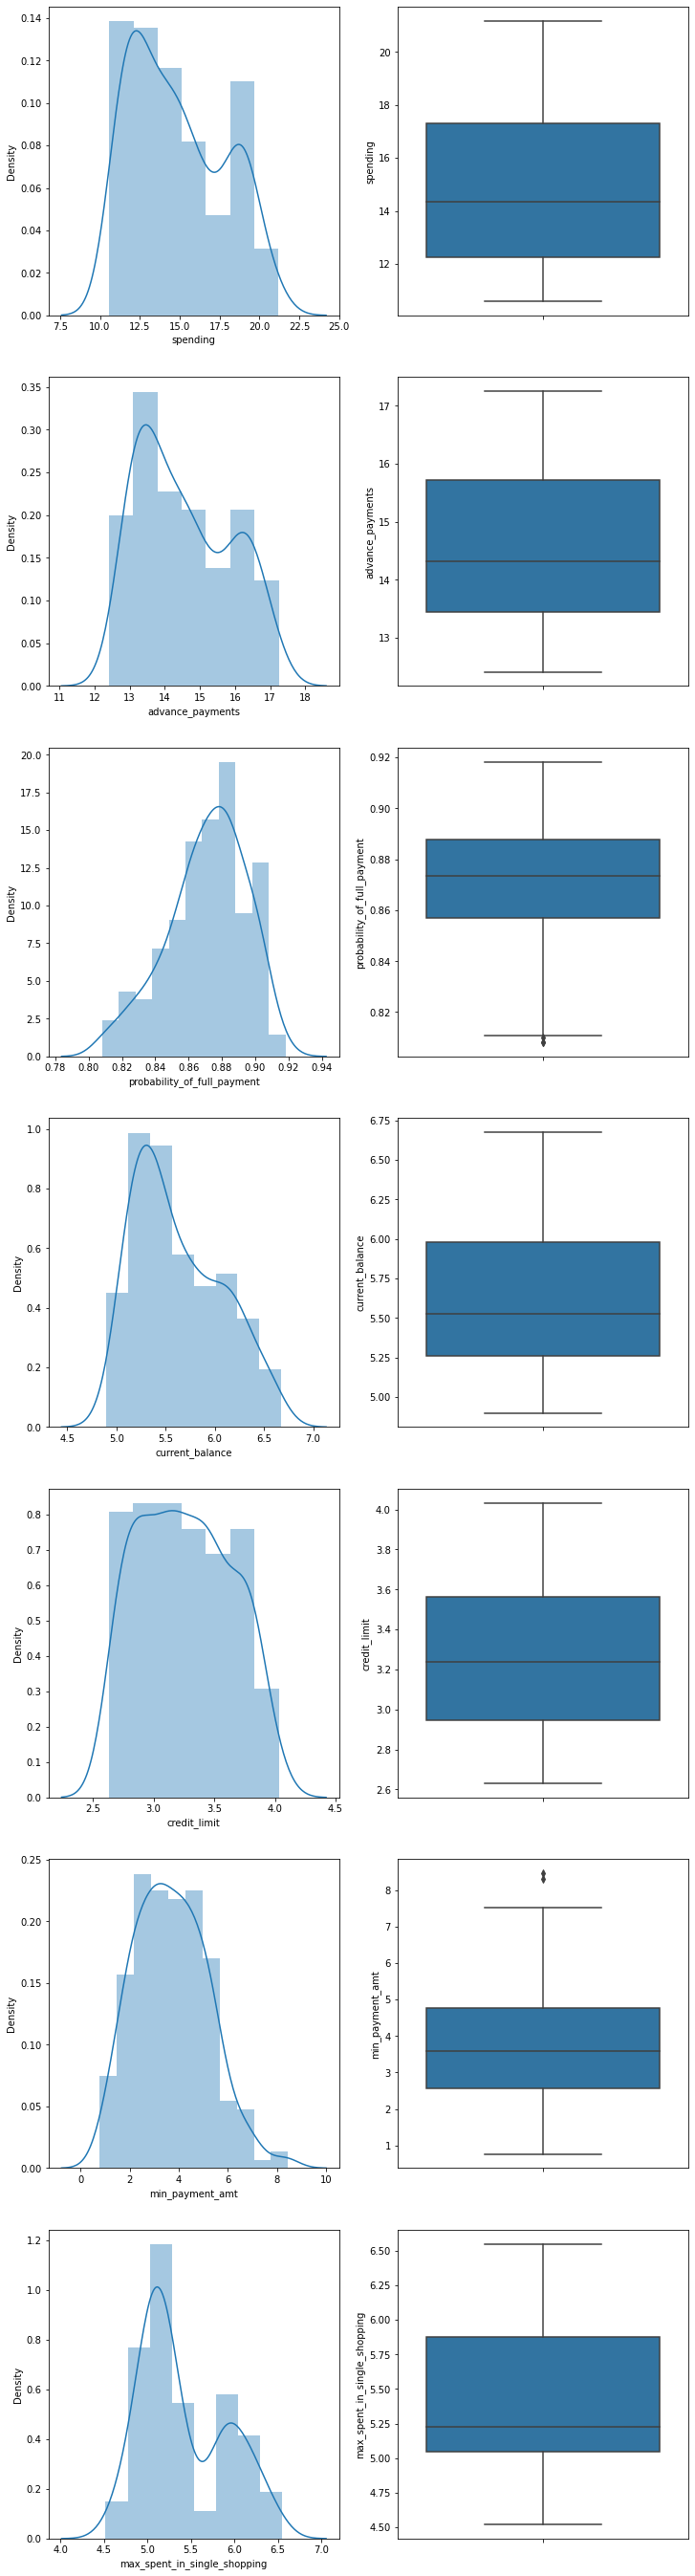

In [207]:
# Univariate Analysis
num_cols = df.select_dtypes(include = ['int64','float64']).columns; # Gives all columns

plt.figure(figsize=(12,120))
for i in range(0,len(num_cols)):
    plt.subplot(17,2,2*i+1)
    sns.distplot(x = df[num_cols[i]], axlabel = num_cols[i]);
    
    plt.subplot(17,2,2*i+2)
    sns.boxplot(y = df[num_cols[i]]);

In [208]:
# Outlier detection

def outlier_values(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [209]:
from scipy.stats import skew
for i in num_cols:
    ll,ul = outlier_values(df[i])
    oc = df[(df[i]<ll) | (df[i]>ul)][i].count()
    total = df[i].count()
    print("Outlier Count on {0}: {1}\tPercentage: {2}".format(i,oc,oc*100/total))
    print("Skewness on {0}: {1}".format(i,skew(df[i])))

Outlier Count on spending: 0	Percentage: 0.0
Skewness on spending: 0.39702715402072153
Outlier Count on advance_payments: 0	Percentage: 0.0
Skewness on advance_payments: 0.38380604212562563
Outlier Count on probability_of_full_payment: 3	Percentage: 1.4285714285714286
Skewness on probability_of_full_payment: -0.5341035521949097
Outlier Count on current_balance: 0	Percentage: 0.0
Skewness on current_balance: 0.5217206481959239
Outlier Count on credit_limit: 0	Percentage: 0.0
Skewness on credit_limit: 0.13341648969738146
Outlier Count on min_payment_amt: 2	Percentage: 0.9523809523809523
Skewness on min_payment_amt: 0.3987925792256687
Outlier Count on max_spent_in_single_shopping: 0	Percentage: 0.0
Skewness on max_spent_in_single_shopping: 0.5578758322317957


### Bi-variate Analysis

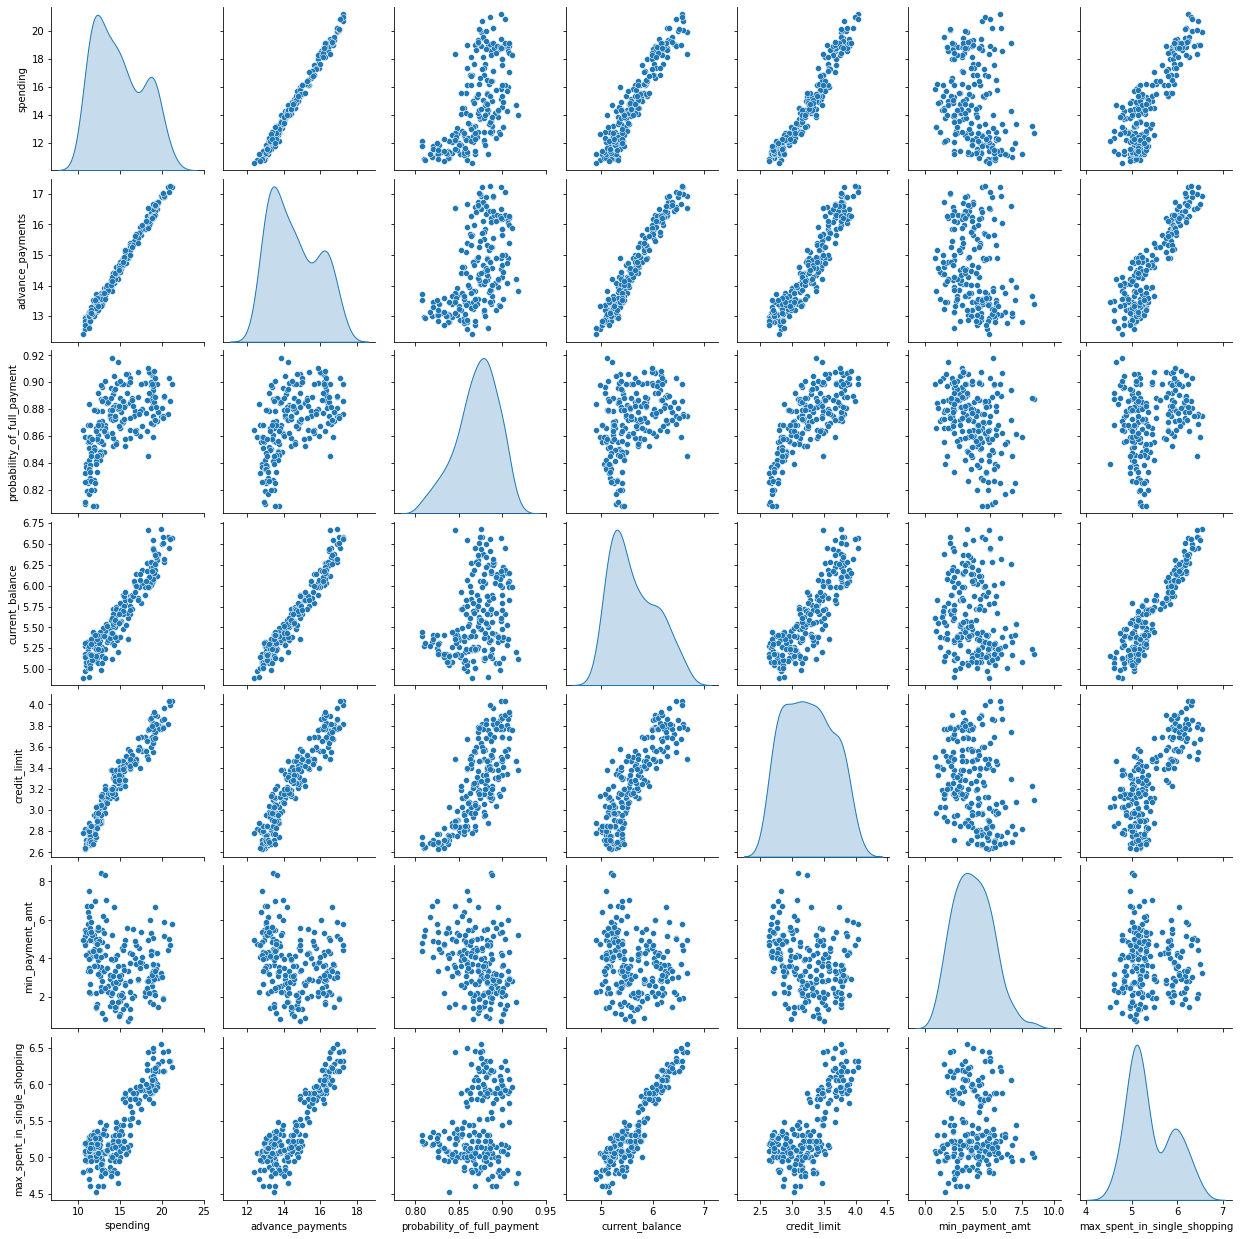

In [210]:
sns.pairplot(df, diag_kind='kde');

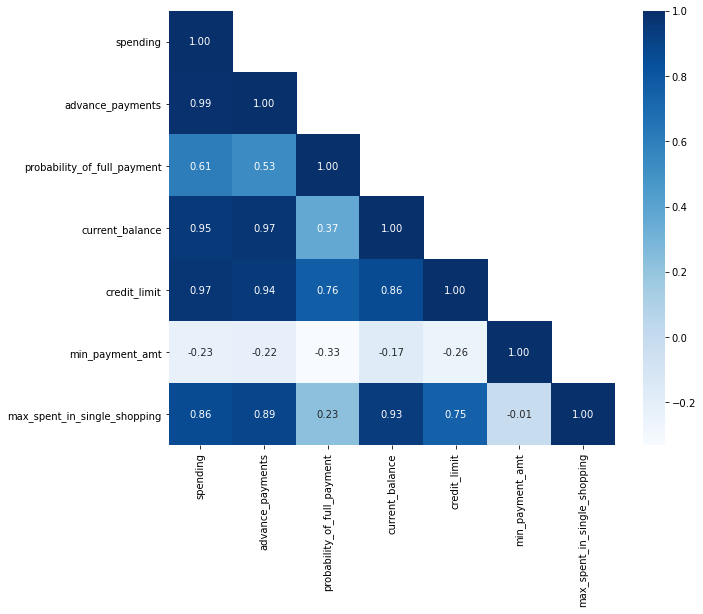

In [211]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues');

In [212]:
#Treating Outlier

for i in num_cols:
    lratio,uratio=outlier_values(df[i])
    df[i]=np.where(df[i]>uratio, uratio, df[i])
    df[i]=np.where(df[i]<lratio, lratio, df[i])

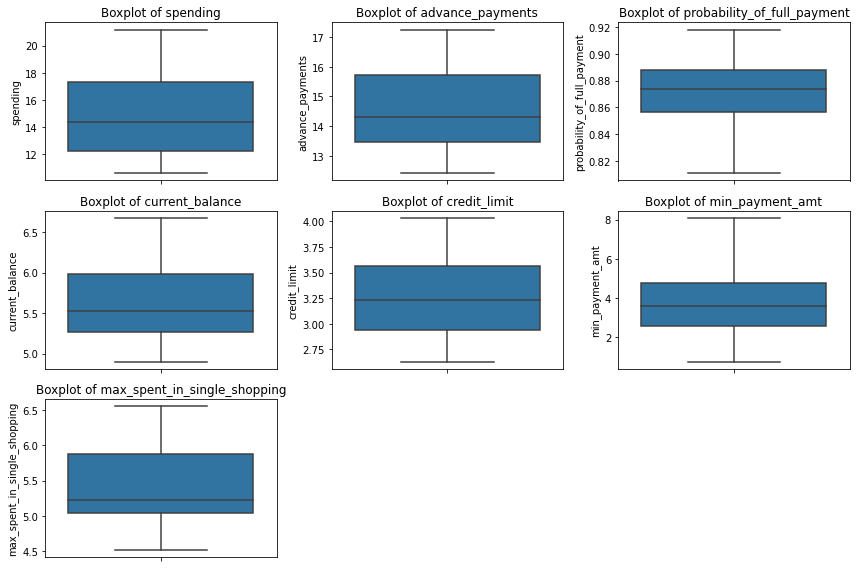

In [213]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [214]:
# Scaling (Z-Score)

from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [215]:
scaled_df = X.fit_transform(df)

In [216]:
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [217]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


### Hierarchical Clustering

In [218]:
# Importing Libraries
from scipy.cluster.hierarchy import dendrogram, linkage

In [219]:
wardlink = linkage(scaled_df, method = 'ward')

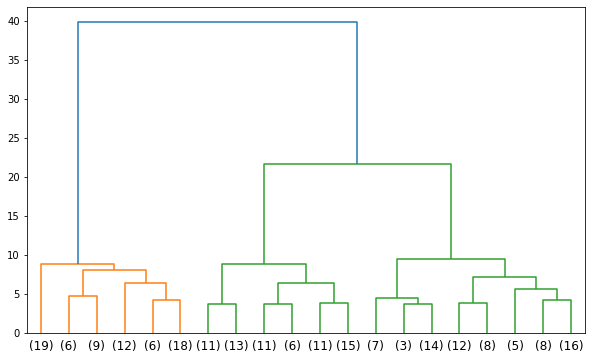

In [220]:
plt.figure(figsize = (10,6))
dend = dendrogram(wardlink, truncate_mode='lastp', p = 20)

In [221]:
# Importing fcluster
from scipy.cluster.hierarchy import fcluster

In [222]:
cluster = fcluster(wardlink, 3, criterion = 'maxclust')

In [223]:
df['Cluster'] = cluster

In [224]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [225]:
df['Cluster'].value_counts().sort_index()

1    70
2    67
3    73
Name: Cluster, dtype: int64

In [226]:
aggdata=df.groupby('Cluster').mean()
aggdata['Freq']=df.Cluster.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Cluster,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### K-Means Clustering

In [227]:
# Importing library for K-Means
from sklearn.cluster import KMeans

In [228]:
# WSS 

wss = []

for i in range(1,16):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

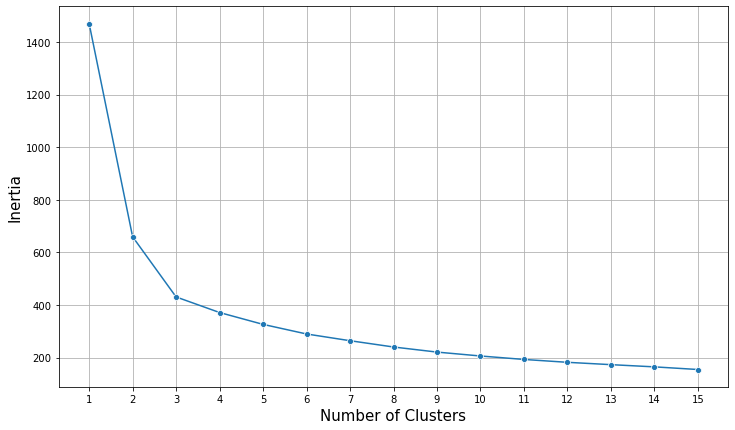

In [229]:
plt.figure(figsize=(12,7))
sns.lineplot(y=wss,x=range(1,16),marker='o')
plt.xlabel('Number of Clusters',fontsize=15)
plt.xticks(range(1,16))
plt.ylabel('Inertia',fontsize=15)
plt.grid()
plt.show()

In [230]:
# Silhouette Score Calculations
from sklearn.metrics import silhouette_samples, silhouette_score

SilhouetteScore = []

for i in range(2,16):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    SilhouetteScore.append(silhouette_score(scaled_df, KM.labels_))

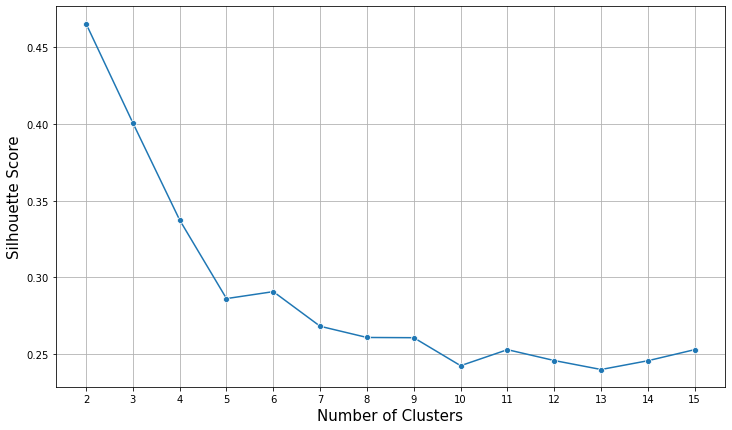

In [231]:
plt.figure(figsize=(12,7))
sns.lineplot(y=SilhouetteScore,x=range(2,16),marker='o')
plt.xlabel('Number of Clusters',fontsize=15)
plt.xticks(range(2,16))
plt.ylabel('Silhouette Score',fontsize=15)
plt.grid()
plt.show()

In [232]:
print("Silhouette Score for K=3 would be {0}".format(SilhouetteScore[1]))

Silhouette Score for K=3 would be 0.4008059221522216


### K-Means with K=3

In [233]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [234]:
df['KMeans-Cluster'] = labels

In [235]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster,KMeans-Cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [236]:
aggdata=df.drop('Cluster',axis=1).groupby('KMeans-Cluster').mean()
aggdata['Freq']=df['KMeans-Cluster'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
KMeans-Cluster,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


<h1><Center> CART-RF-ANN </Center></h1>

In [237]:
# Reading the data
df = pd.read_csv("insurance_part2_data.csv")

In [238]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Basic Stats about data

In [239]:
df.shape

(3000, 10)

In [240]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB
None


In [241]:
df.isnull().any()

Age             False
Agency_Code     False
Type            False
Claimed         False
Commision       False
Channel         False
Duration        False
Sales           False
Product Name    False
Destination     False
dtype: bool

In [242]:
df.duplicated().sum()

139

In [243]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
print('Agency Code:\n',df.Agency_Code.value_counts())
print('\n')
print('Type:\n',df.Type.value_counts())
print('\n')
print('Claimed:\n',df.Claimed.value_counts())
print('\n')
print('Channel:\n',df.Channel.value_counts())
print('\n')
print('Product Name:\n',df['Product Name'].value_counts())
print('\n')
print('Destination:\n',df.Destination.value_counts())

Agency Code:
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type:
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed:
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel:
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name:
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination:
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


### Univariate Analysis

#### Numerical Variable

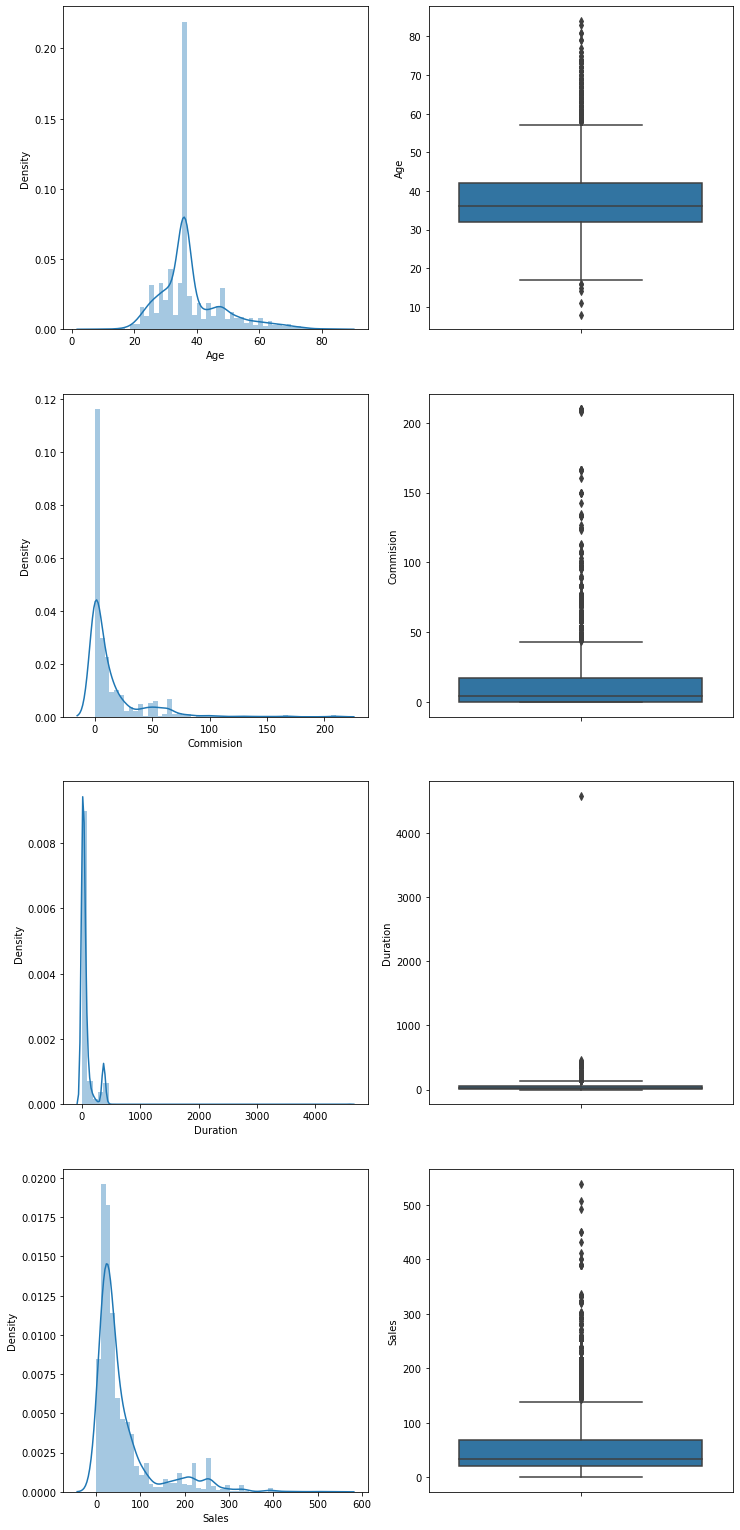

In [245]:

num_cols = df.select_dtypes(include = ['int64','float64']).columns; # Gives all columns

plt.figure(figsize=(12,120))
for i in range(0,len(num_cols)):
    plt.subplot(17,2,2*i+1)
    sns.distplot(x = df[num_cols[i]], axlabel = num_cols[i]);
    
    plt.subplot(17,2,2*i+2)
    sns.boxplot(y = df[num_cols[i]]);

In [246]:
# Outlier detection

def outlier_values(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [247]:
from scipy.stats import skew
for i in num_cols:
    ll,ul = outlier_values(df[i])
    oc = df[(df[i]<ll) | (df[i]>ul)][i].count()
    total = df[i].count()
    print("Outlier Count on {0}: {1}\tPercentage: {2}".format(i,oc,oc*100/total))
    print("Skewness on {0}: {1}".format(i,skew(df[i])))

Outlier Count on Age: 204	Percentage: 6.8
Skewness on Age: 1.1491378342501222
Outlier Count on Commision: 362	Percentage: 12.066666666666666
Skewness on Commision: 3.14728312474899
Outlier Count on Duration: 382	Percentage: 12.733333333333333
Skewness on Duration: 13.777787729512905
Outlier Count on Sales: 353	Percentage: 11.766666666666667
Skewness on Sales: 2.3799577220603045


#### Categorical Variable

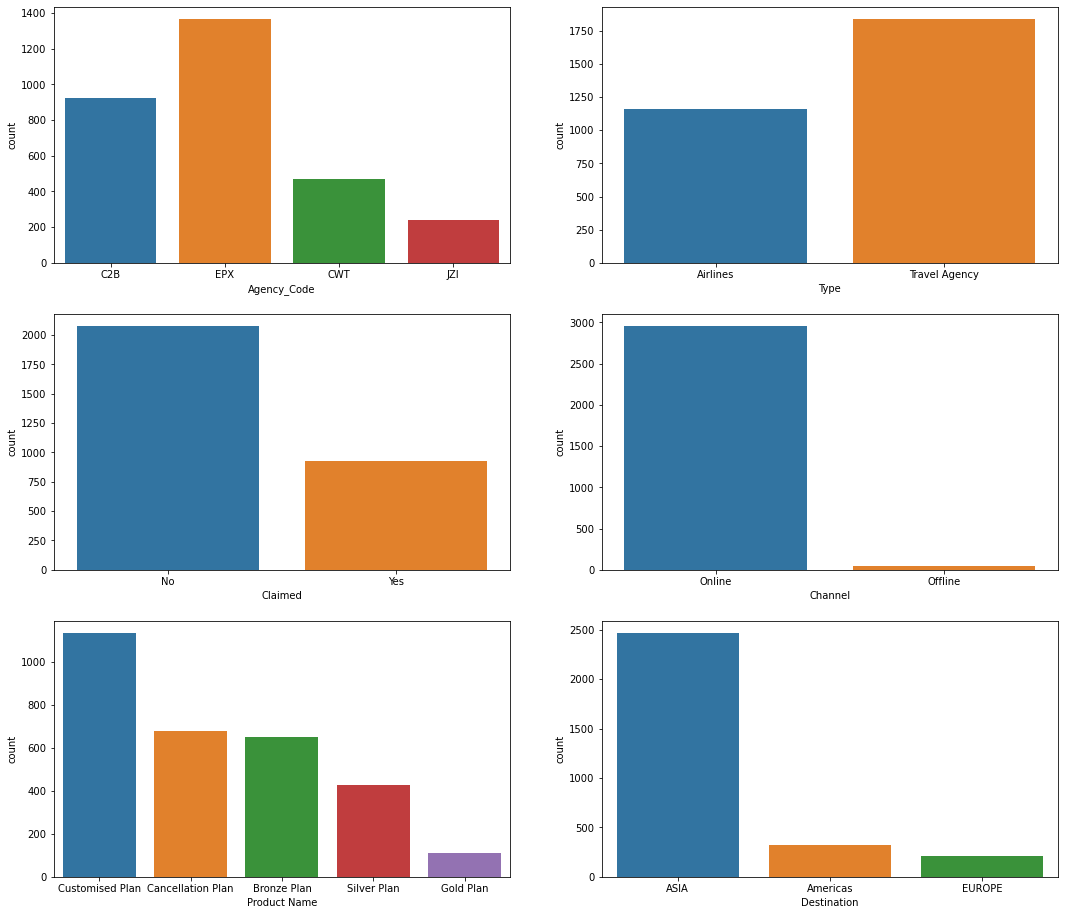

In [248]:
cat_cols = df.select_dtypes(include = ['object']).columns; # Gives all columns

plt.figure(figsize=(18,16))
val = 1
for i in cat_cols:
    plt.subplot(3,2,val)
    sns.countplot(df[i])
    val += 1
    

### Bi-Variate Analysis

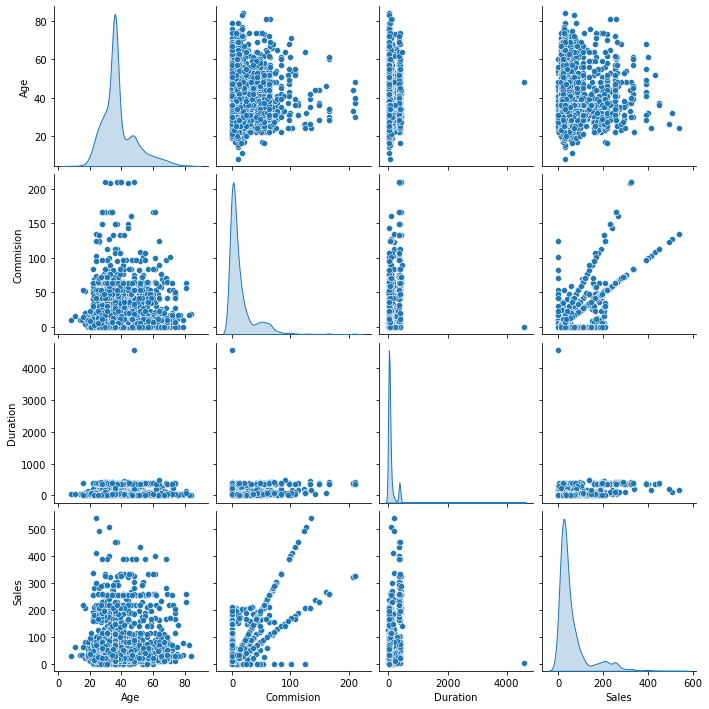

In [249]:
sns.pairplot(df, diag_kind='kde');

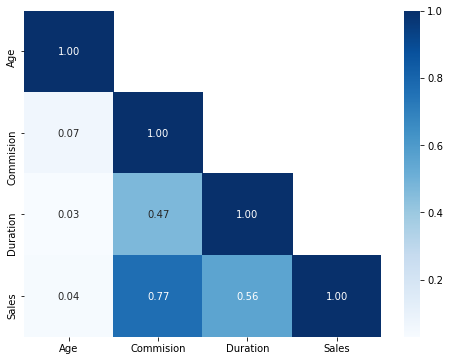

In [250]:
corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues');

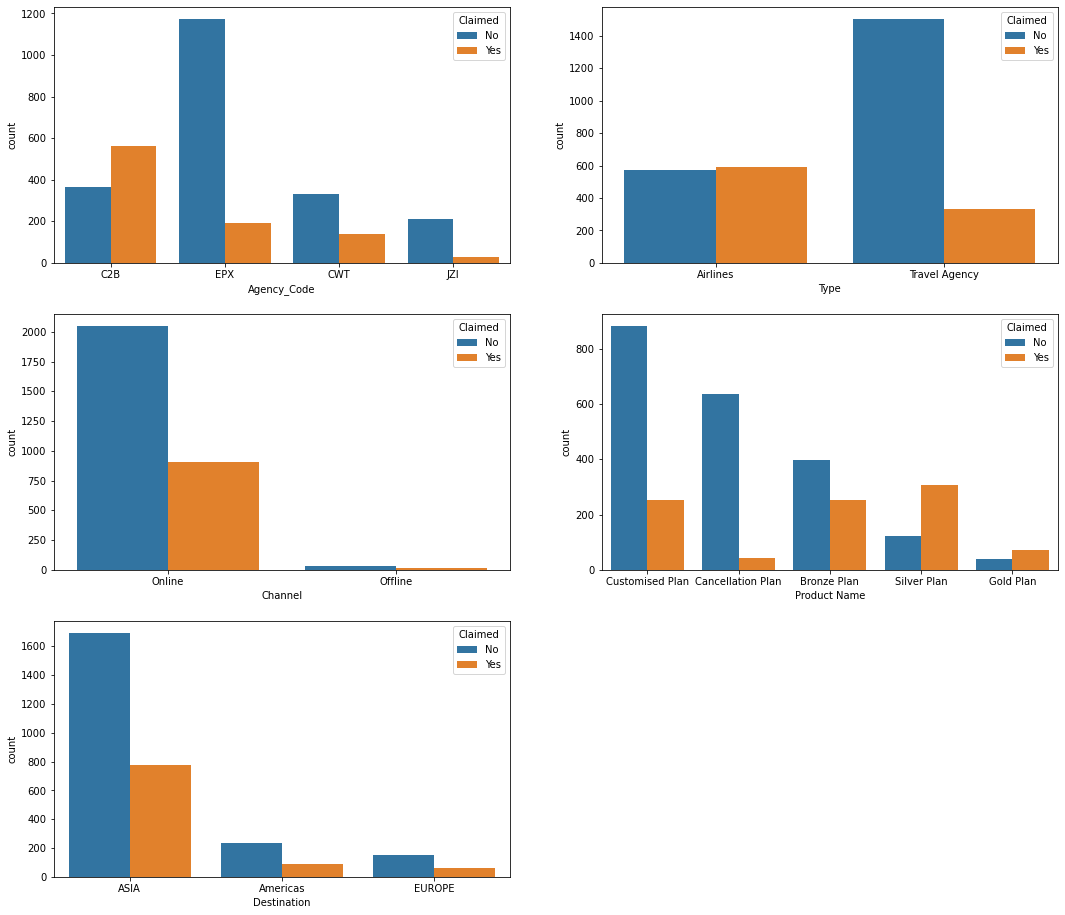

In [251]:
cat_cols = df.select_dtypes(include = ['object']).columns;

plt.figure(figsize=(18,16))
val = 1
for i in cat_cols:
    if(i != 'Claimed'):
        plt.subplot(3,2,val)
        sns.countplot(df[i], hue=df.Claimed)
        val += 1

### CART, RF and ANN

In [252]:
# Object to Code conversion

cat_cols = df.select_dtypes(include = ['object']).columns;

for i in cat_cols:
    print('Feature: {0}'.format(i))
    print(df[i].unique())
    print(pd.Categorical(df[i].unique()).codes)
    df[i] = pd.Categorical(df[i]).codes

Feature: Agency_Code
['C2B' 'EPX' 'CWT' 'JZI']
[0 2 1 3]
Feature: Type
['Airlines' 'Travel Agency']
[0 1]
Feature: Claimed
['No' 'Yes']
[0 1]
Feature: Channel
['Online' 'Offline']
[1 0]
Feature: Product Name
['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
[2 1 0 4 3]
Feature: Destination
['ASIA' 'Americas' 'EUROPE']
[0 1 2]


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [254]:
# Proportion of Yes and No
df['Claimed'].value_counts(normalize=True)*100

0    69.2
1    30.8
Name: Claimed, dtype: float64

In [255]:
X = df.drop('Claimed', axis = 1)
y = df.pop('Claimed')

In [256]:
# Splitting Data

from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=123)

In [257]:
train_labels.value_counts(normalize=True)

0    0.687619
1    0.312381
Name: Claimed, dtype: float64

In [258]:
test_labels.value_counts(normalize=True)

0    0.702222
1    0.297778
Name: Claimed, dtype: float64

In [259]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (2100, 9)
X_test (900, 9)


In [260]:
# Import CART, RF and ANN libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [261]:
# Grid Search CV to find Best Params for each Model
from sklearn.model_selection import GridSearchCV

#### Decision Tree Classification

In [262]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(random_state=123)

dt_grid = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [263]:
dt_grid.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [264]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 150}

In [265]:
# Preserving best DT grid/Model
dtcl = dt_grid.best_estimator_

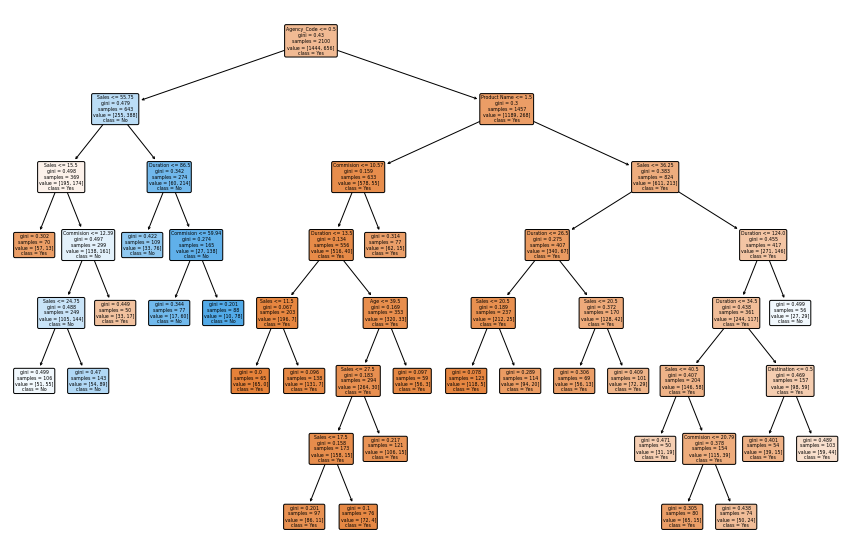

In [266]:
from sklearn import tree

train_char_label = ['Yes','No']
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(dt_grid.best_estimator_, 
              feature_names=list(X_train),
              class_names=list(train_char_label), 
              filled=True, impurity=True, 
              rounded=True);

In [267]:
imp_df = pd.DataFrame(dtcl.feature_importances_*100,index = X_train.columns,columns=["Importance"]).sort_values(by=["Importance"],ascending=False)

In [268]:
imp_df

,Importance
Agency_Code,58.972971
Sales,24.271097
Product Name,7.919875
Duration,4.706954
Commision,3.438275
Destination,0.594083
Age,0.096745
Type,0.000000
Channel,0.000000


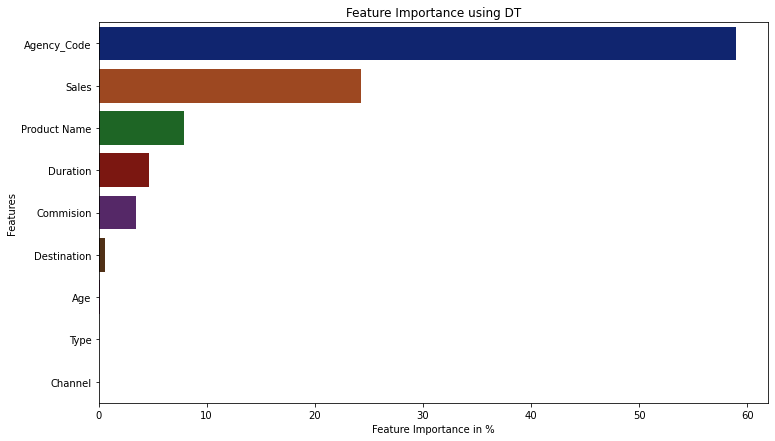

In [269]:
plt.figure(figsize=(12,7))
sns.barplot(imp_df["Importance"],imp_df.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using DT')
plt.show()

In [270]:
train_pred = dtcl.predict(X_train)
test_pred = dtcl.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [272]:
print("Accuracy Score on Train data: {0}".format(round(accuracy_score(train_labels, train_pred),3)))
print("Accuracy Score on Test data: {0}".format(round(accuracy_score(test_labels, test_pred),3)))

Accuracy Score on Train data: 0.78
Accuracy Score on Test data: 0.781


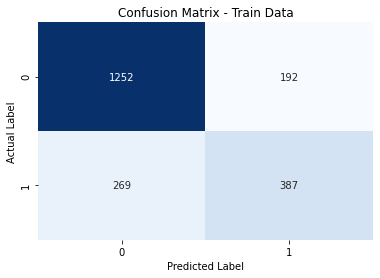

In [273]:
sns.heatmap(confusion_matrix(train_labels,train_pred),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

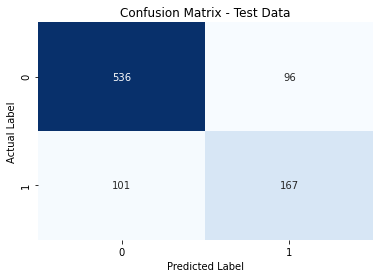

In [274]:
sns.heatmap(confusion_matrix(test_labels,test_pred),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [275]:
print(classification_report(train_labels, train_pred)) #Train Data

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1444
           1       0.67      0.59      0.63       656

    accuracy                           0.78      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.77      0.78      0.78      2100



In [276]:
print(classification_report(test_labels, test_pred)) #Test Data

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       632
           1       0.63      0.62      0.63       268

    accuracy                           0.78       900
   macro avg       0.74      0.74      0.74       900
weighted avg       0.78      0.78      0.78       900



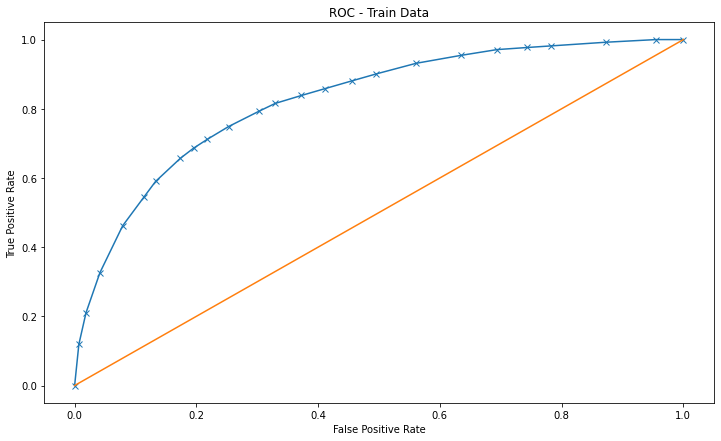

Area under Curve is 0.8243393605161813


In [277]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr, threshold = roc_curve(train_labels,dtcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Decision Tree')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,dtcl.predict_proba(X_train)[:,1]))

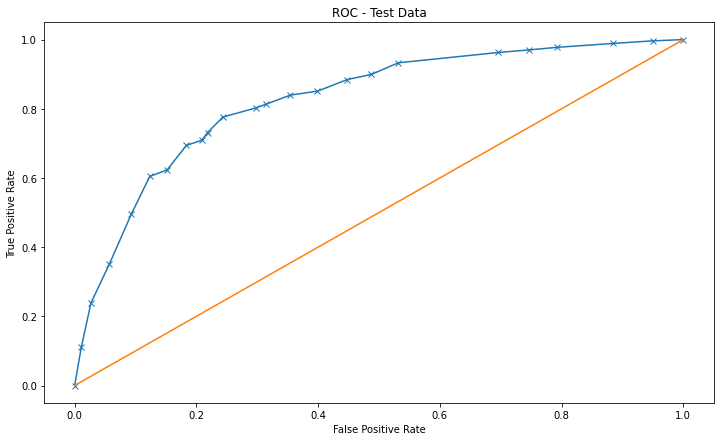

Area under Curve is 0.8260231673908935


In [278]:

rf_fpr, rf_tpr, threshold = roc_curve(test_labels,dtcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Decision Tree')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Data')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,dtcl.predict_proba(X_test)[:,1]))

#### Random Forest Classification

In [279]:
param_grid = {
    'max_depth': [6, 8, 10, 12],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [50, 75, 100, 125],
    'min_samples_split': [30, 50, 70],
    'n_estimators': [100, 200, 300]
}

rfcl = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [280]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [6, 8, 10, 12], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [50, 75, 100, 125],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [100, 200, 300]})

In [281]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 125,
 'min_samples_split': 30,
 'n_estimators': 100}

In [282]:
# Preserving best RF grid/Model
rfcl = grid_search.best_estimator_

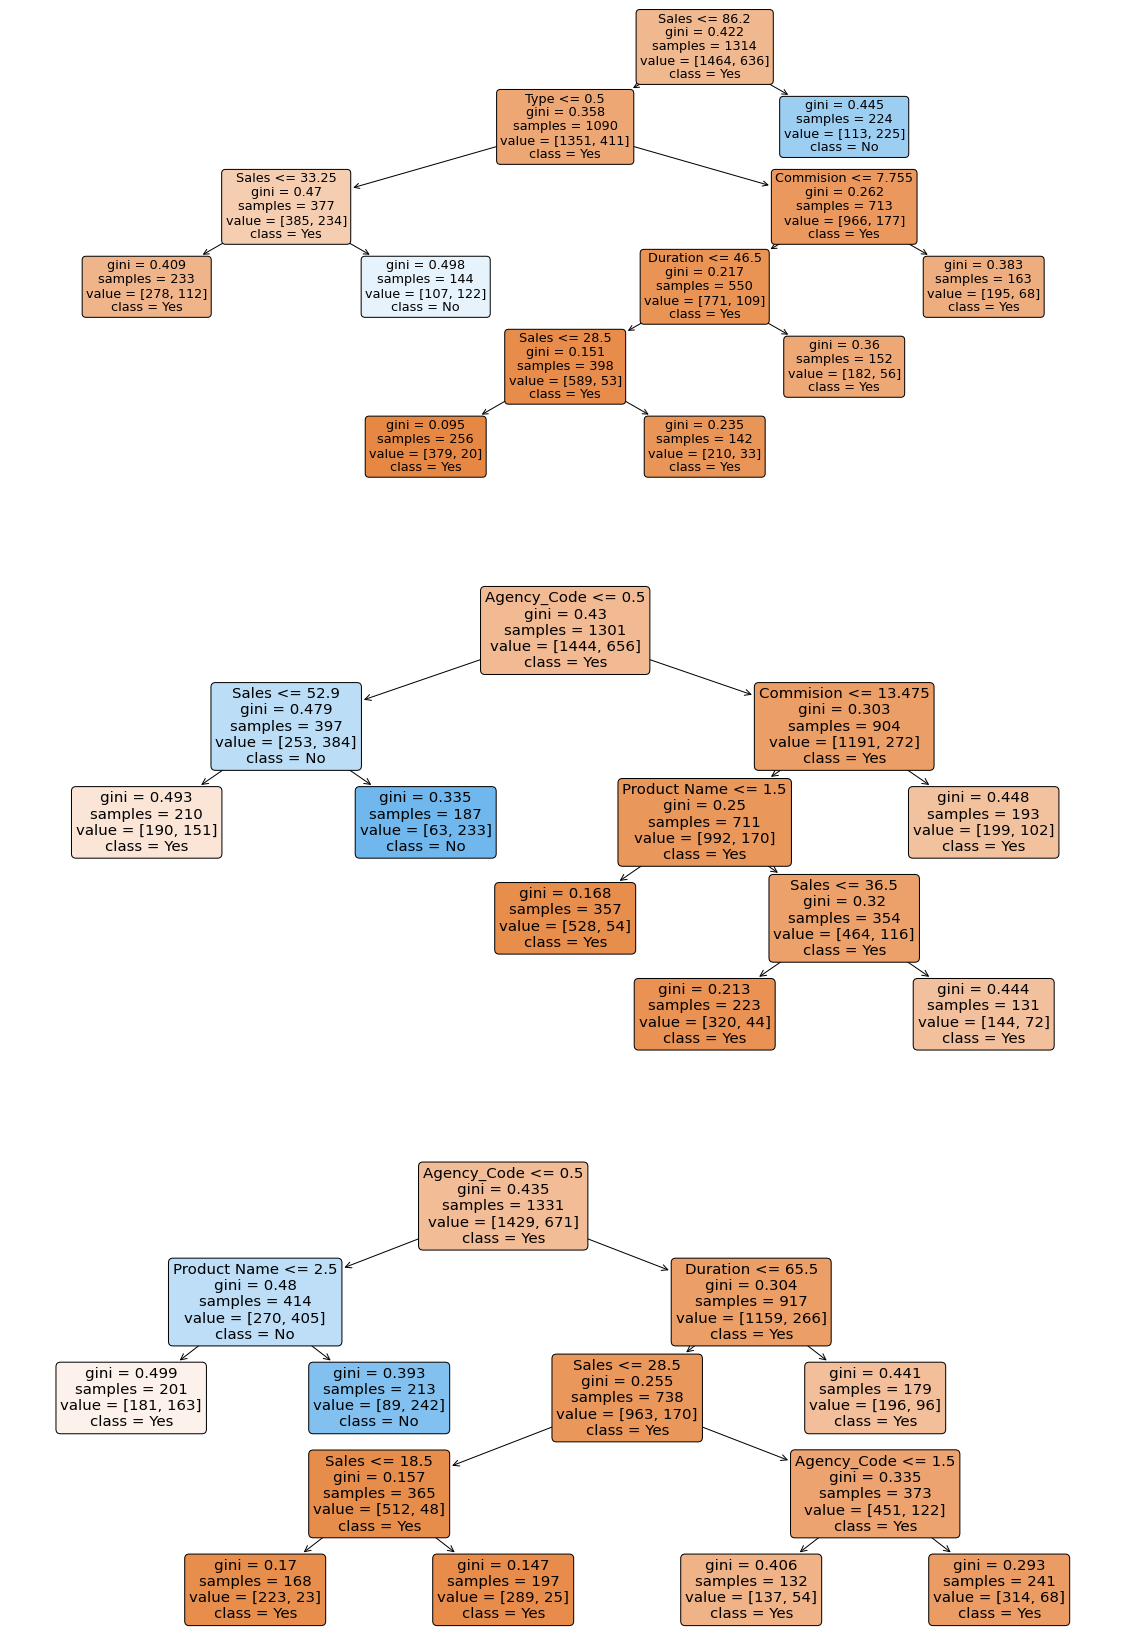

In [283]:
train_char_label = ['Yes','No']
fig = plt.figure(figsize=(20, 30))
for i in range(0,3):
    plt.subplot(3,1,i+1)
    tree.plot_tree(rfcl.estimators_[i], 
              feature_names=list(X_train),
              class_names=list(train_char_label), 
              filled=True, impurity=True, 
              rounded=True)
    plt.xlabel('Random Forest Tree #{0}'.format(i),fontsize=15);

In [284]:
train_predict = rfcl.predict(X_train)
test_predict = rfcl.predict(X_test)

In [285]:
print("Accuracy Score on Train data: {0}".format(round(accuracy_score(train_labels, train_predict),3)))
print("Accuracy Score on Test data: {0}".format(round(accuracy_score(test_labels, test_predict),3)))

Accuracy Score on Train data: 0.772
Accuracy Score on Test data: 0.784


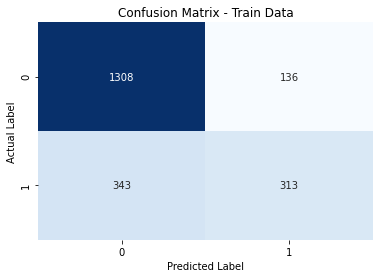

In [286]:
sns.heatmap(confusion_matrix(train_labels,train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

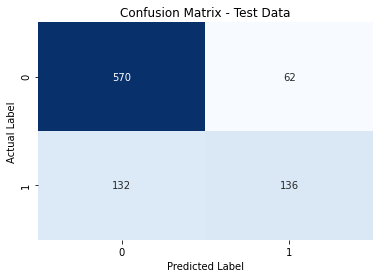

In [287]:
sns.heatmap(confusion_matrix(test_labels,test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [288]:
print(classification_report(train_labels,train_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1444
           1       0.70      0.48      0.57       656

    accuracy                           0.77      2100
   macro avg       0.74      0.69      0.71      2100
weighted avg       0.76      0.77      0.76      2100



In [289]:
print(classification_report(test_labels,test_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       632
           1       0.69      0.51      0.58       268

    accuracy                           0.78       900
   macro avg       0.75      0.70      0.72       900
weighted avg       0.77      0.78      0.77       900



In [290]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns, columns=["Importance"]).sort_values(by=["Importance"],ascending=False)
x

,Importance
Agency_Code,44.085230
Product Name,30.333250
Sales,14.088082
Commision,4.219720
Type,3.657549
Duration,3.166368
Destination,0.226961
Age,0.222839
Channel,0.000000


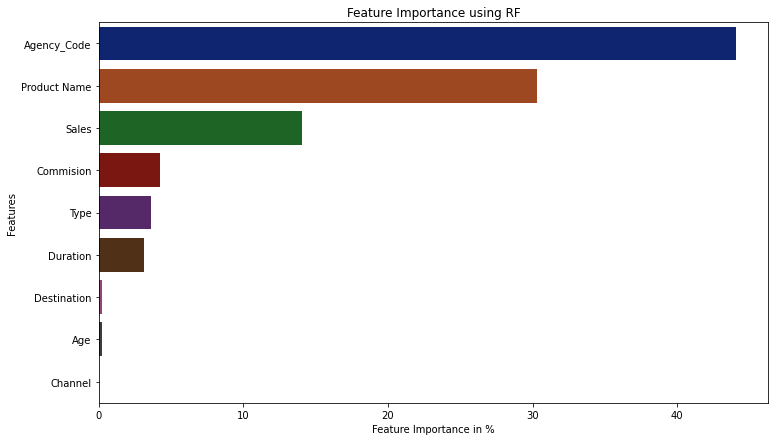

In [291]:
plt.figure(figsize=(12,7))
sns.barplot(x["Importance"],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

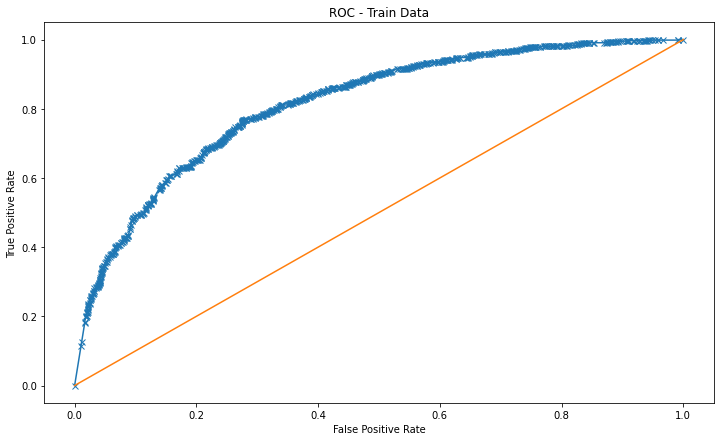

Area under Curve is 0.812728025133437


In [292]:

rf_fpr, rf_tpr, threshold = roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

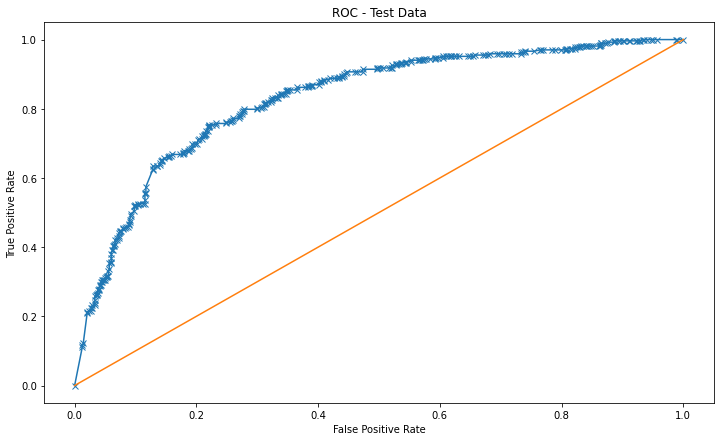

Area under Curve is 0.8285087615718874


In [293]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr, threshold = roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Data')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

#### MLP Classifier (Artificial Neural Network)

In [294]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [295]:
X_trains

array([[ 0.27389072, -1.31210529, -1.25818354, ...,  2.72842315,
         1.84403637, -0.43185749],
       [-0.50732559, -0.30463871,  0.7947966 , ...,  3.68373281,
         1.04902993,  1.29557246],
       [-0.99558579, -1.31210529, -1.25818354, ..., -0.52940954,
        -1.3359894 , -0.43185749],
       ...,
       [ 2.51988761, -0.30463871,  0.7947966 , ...,  2.09131382,
         0.25402349,  1.29557246],
       [-0.21436948,  0.70282788,  0.7947966 , ..., -0.3026298 ,
        -0.54098296, -0.43185749],
       [-0.21436948,  0.70282788,  0.7947966 , ..., -0.4301934 ,
        -0.54098296, -0.43185749]])

In [296]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

anncl = MLPClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = anncl, param_grid = param_grid, cv = 3)

In [297]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=123),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [298]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [299]:
mlpcl = grid_search.best_estimator_

In [300]:
train_predict = mlpcl.predict(X_trains)
test_predict = mlpcl.predict(X_tests)

In [301]:
print("Accuracy Score on Train data: {0}".format(round(accuracy_score(train_labels, train_predict),3)))
print("Accuracy Score on Test data: {0}".format(round(accuracy_score(test_labels, test_predict),3)))

Accuracy Score on Train data: 0.78
Accuracy Score on Test data: 0.791


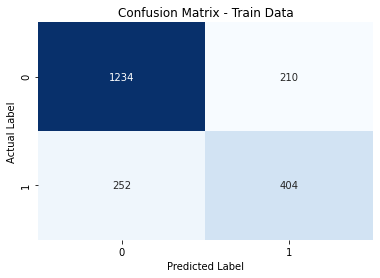

In [302]:
sns.heatmap(confusion_matrix(train_labels,train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

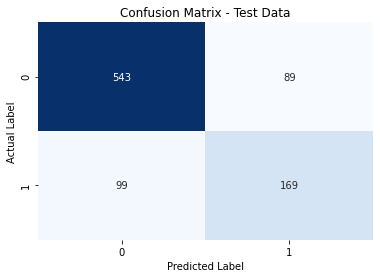

In [303]:
sns.heatmap(confusion_matrix(test_labels,test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [304]:
print(classification_report(train_labels,train_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1444
           1       0.66      0.62      0.64       656

    accuracy                           0.78      2100
   macro avg       0.74      0.74      0.74      2100
weighted avg       0.78      0.78      0.78      2100



In [305]:
print(classification_report(test_labels,test_predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       632
           1       0.66      0.63      0.64       268

    accuracy                           0.79       900
   macro avg       0.75      0.74      0.75       900
weighted avg       0.79      0.79      0.79       900



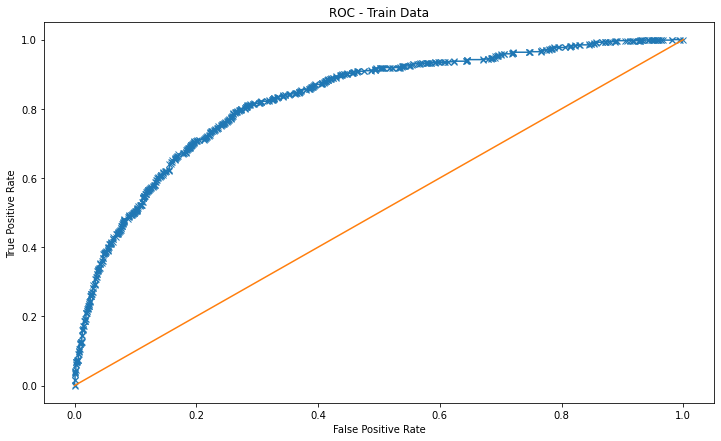

Area under Curve is 0.8284258664955071


In [306]:

rf_fpr, rf_tpr, threshold = roc_curve(train_labels,mlpcl.predict_proba(X_trains)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,mlpcl.predict_proba(X_trains)[:,1]))

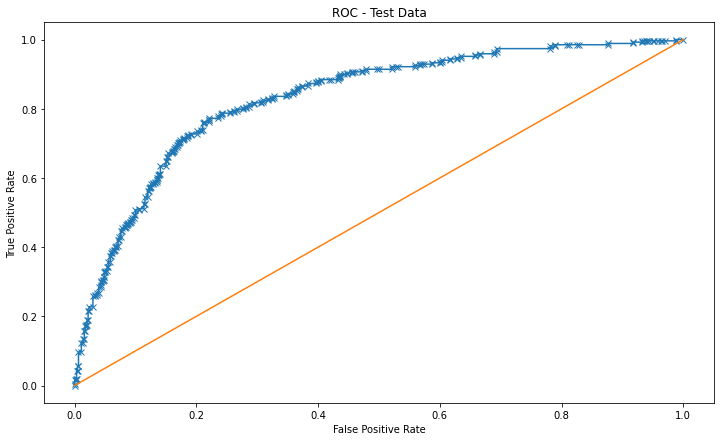

Area under Curve is 0.8305692660117137


In [307]:

rf_fpr, rf_tpr, threshold = roc_curve(test_labels,mlpcl.predict_proba(X_tests)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Data')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,mlpcl.predict_proba(X_tests)[:,1]))

### Model Comparison

Area under the curve for Decision Tree Classification Model is 0.8243393605161813
Area under the curve for Random Forest Classification Model is 0.812728025133437
Area under the curve for Artificial Neural Network Model is 0.8284258664955071


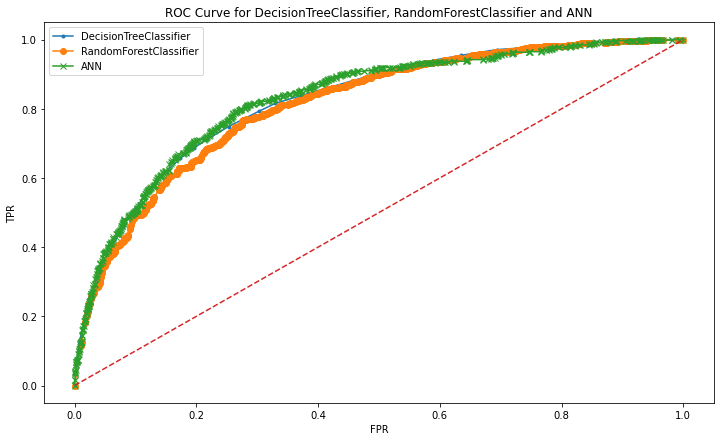

In [311]:
# Train Data

models_names={dtcl:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',mlpcl:'ANN'}

print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(train_labels,dtcl.predict_proba(X_train)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(train_labels,mlpcl.predict_proba(X_trains)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(train_labels, dtcl.predict_proba(X_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(train_labels, rfcl.predict_proba(X_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(train_labels, mlpcl.predict_proba(X_trains)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve [Train Data] for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for Decision Tree Classification Model is 0.8260231673908935
Area under the curve for Random Forest Classification Model is 0.8285087615718874
Area under the curve for Artificial Neural Network Model is 0.8305692660117137


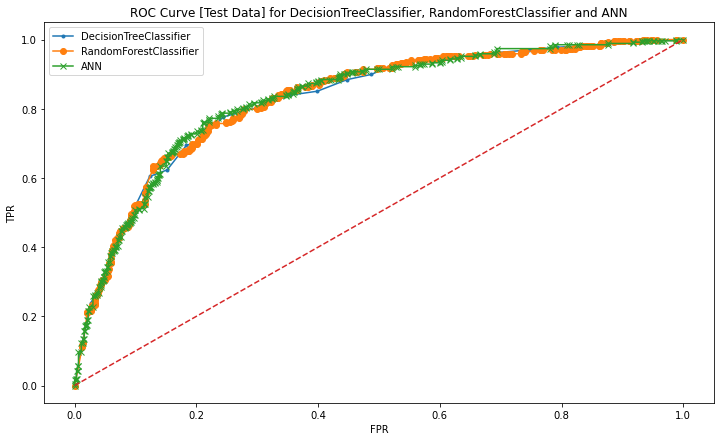

In [312]:
# Test Data

print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,dtcl.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,mlpcl.predict_proba(X_tests)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, dtcl.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, rfcl.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels, mlpcl.predict_proba(X_tests)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve [Test Data] for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()